## НИРС по дисциплине «Технологии машинного обучения»
## Яковенко Юлия РТ5-61Б

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасета

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
wine = load_wine()

In [3]:
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [4]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

In [7]:
# Размер датасета - 178 строк, 14 колонок
df.shape

(178, 14)

In [5]:
# проверим есть ли пропущенные значения
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
# Список колонок с типами данных
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

**Датасет не содержит пропусков и имеет только числовые параметры.**

### Построение графиков для понимания структуры данных

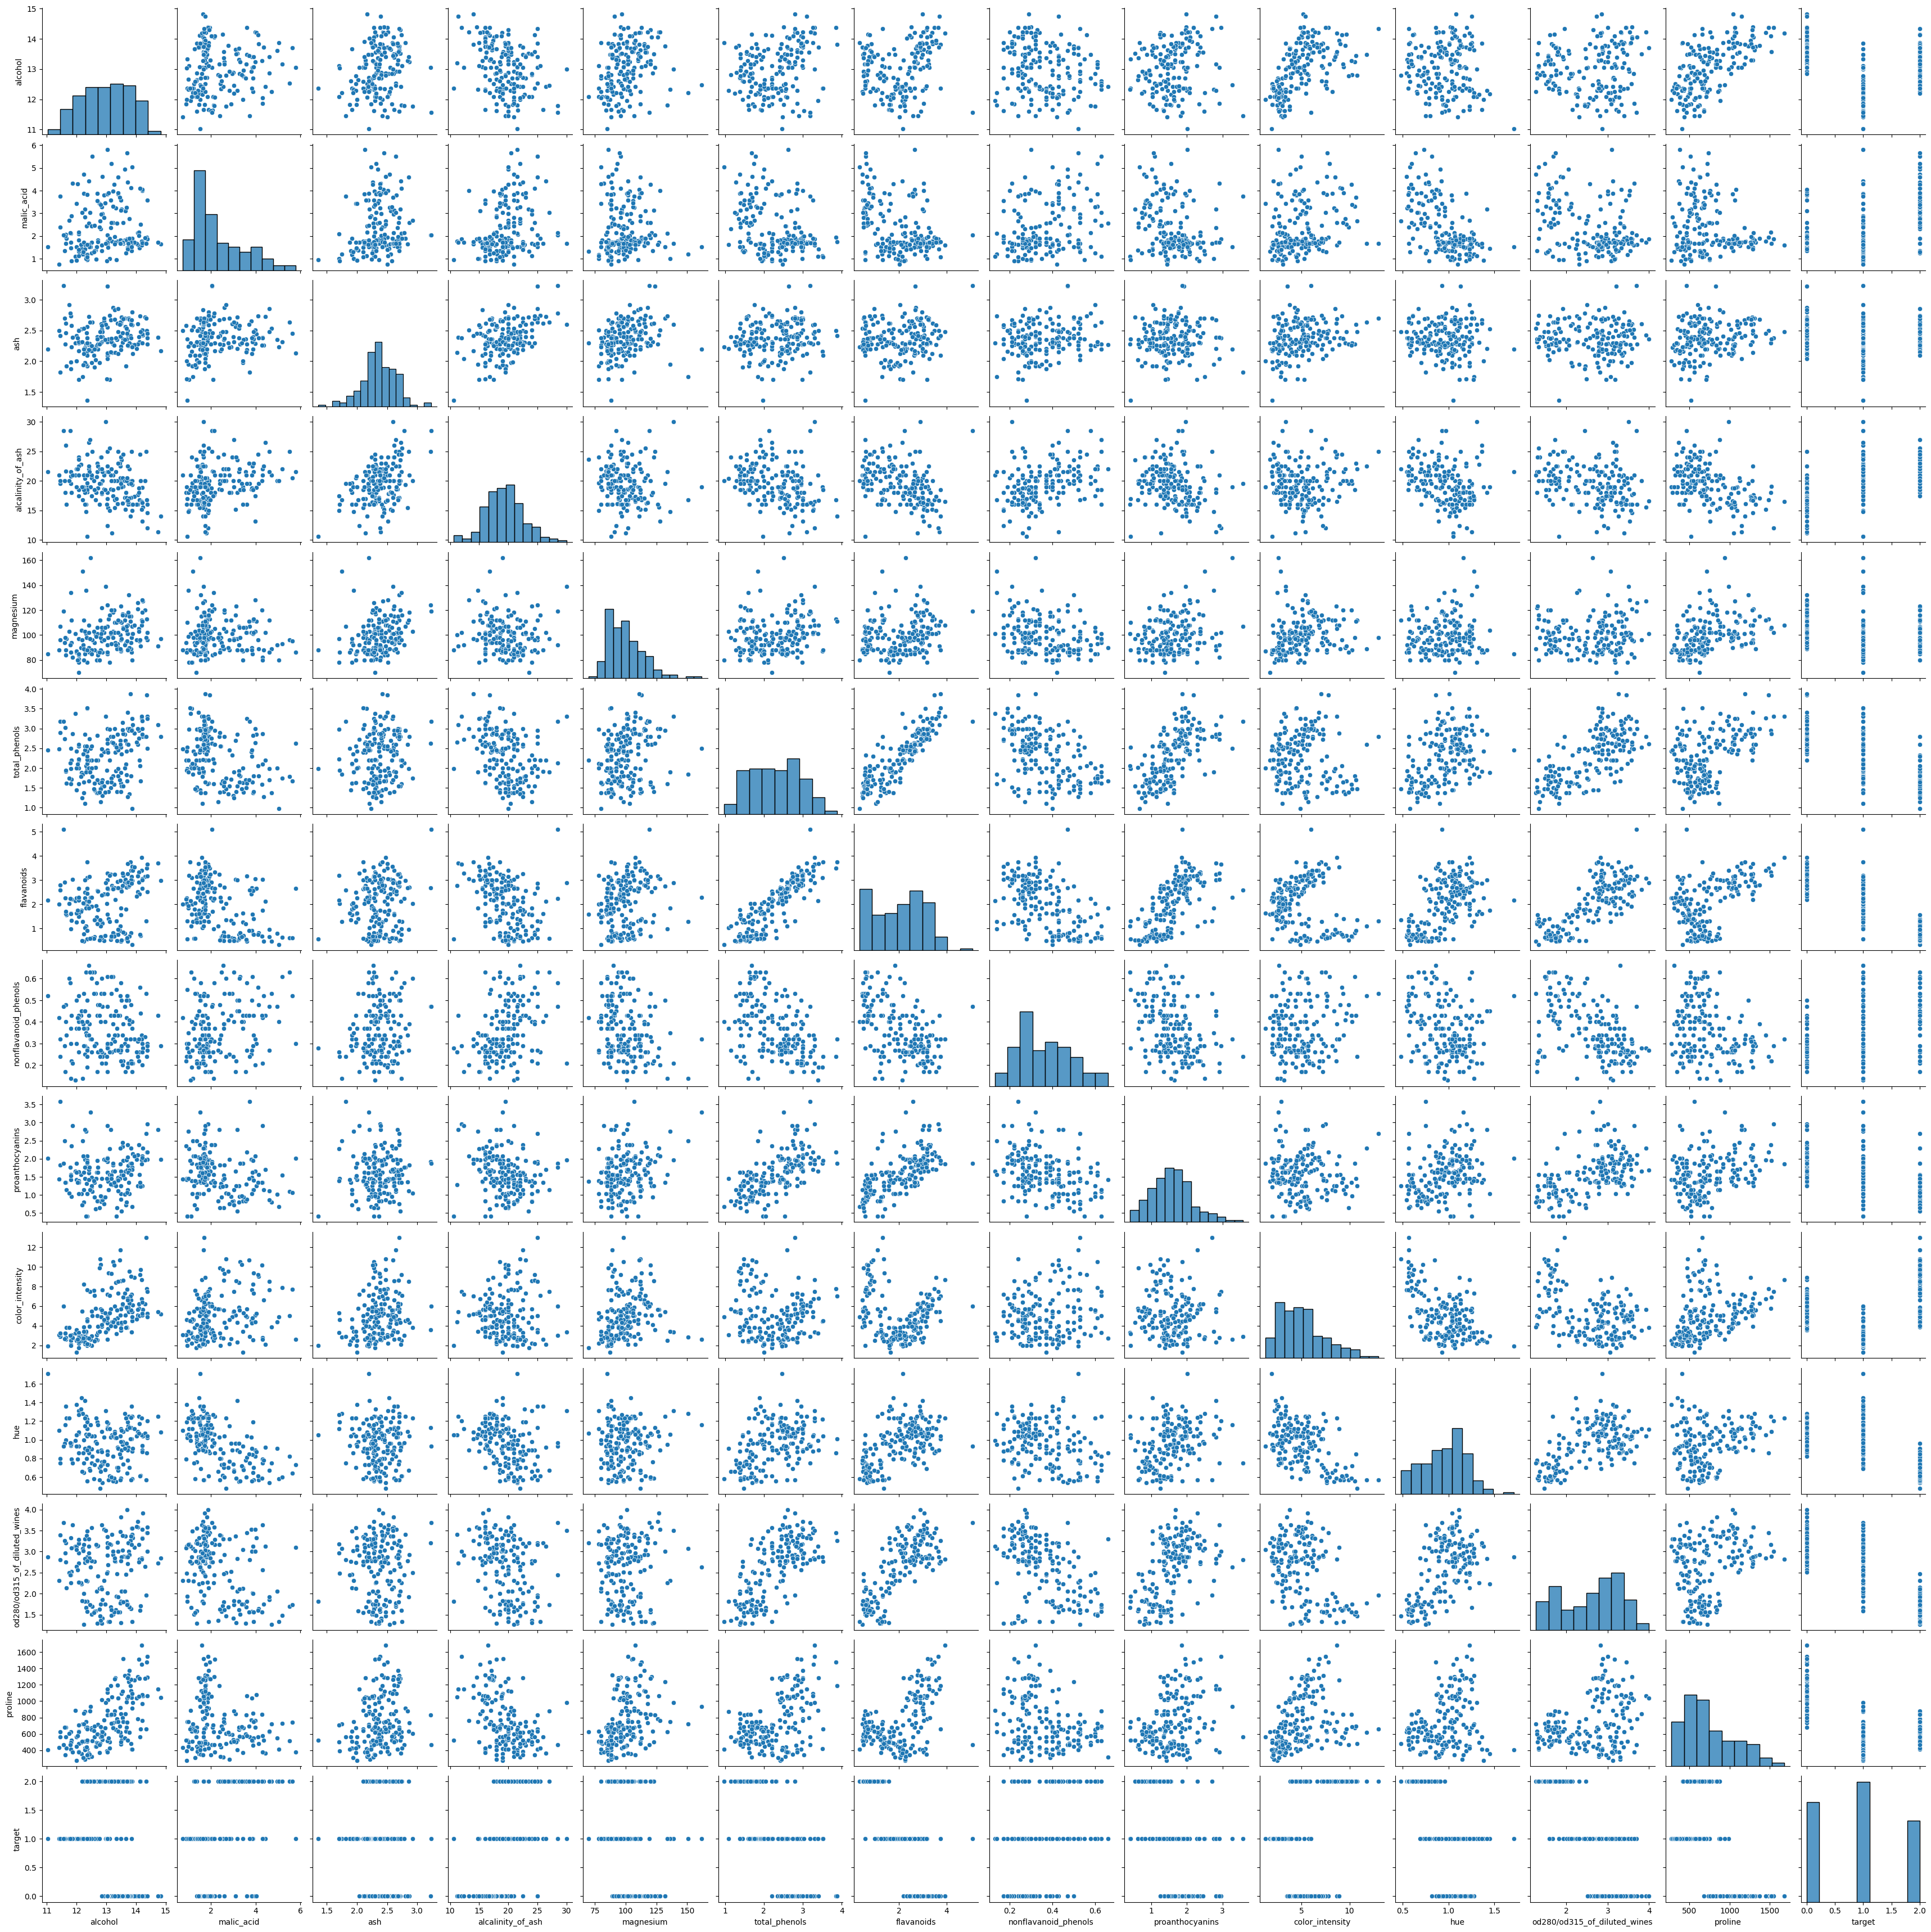

In [8]:
# Парные диаграммы
sns.pairplot(df)

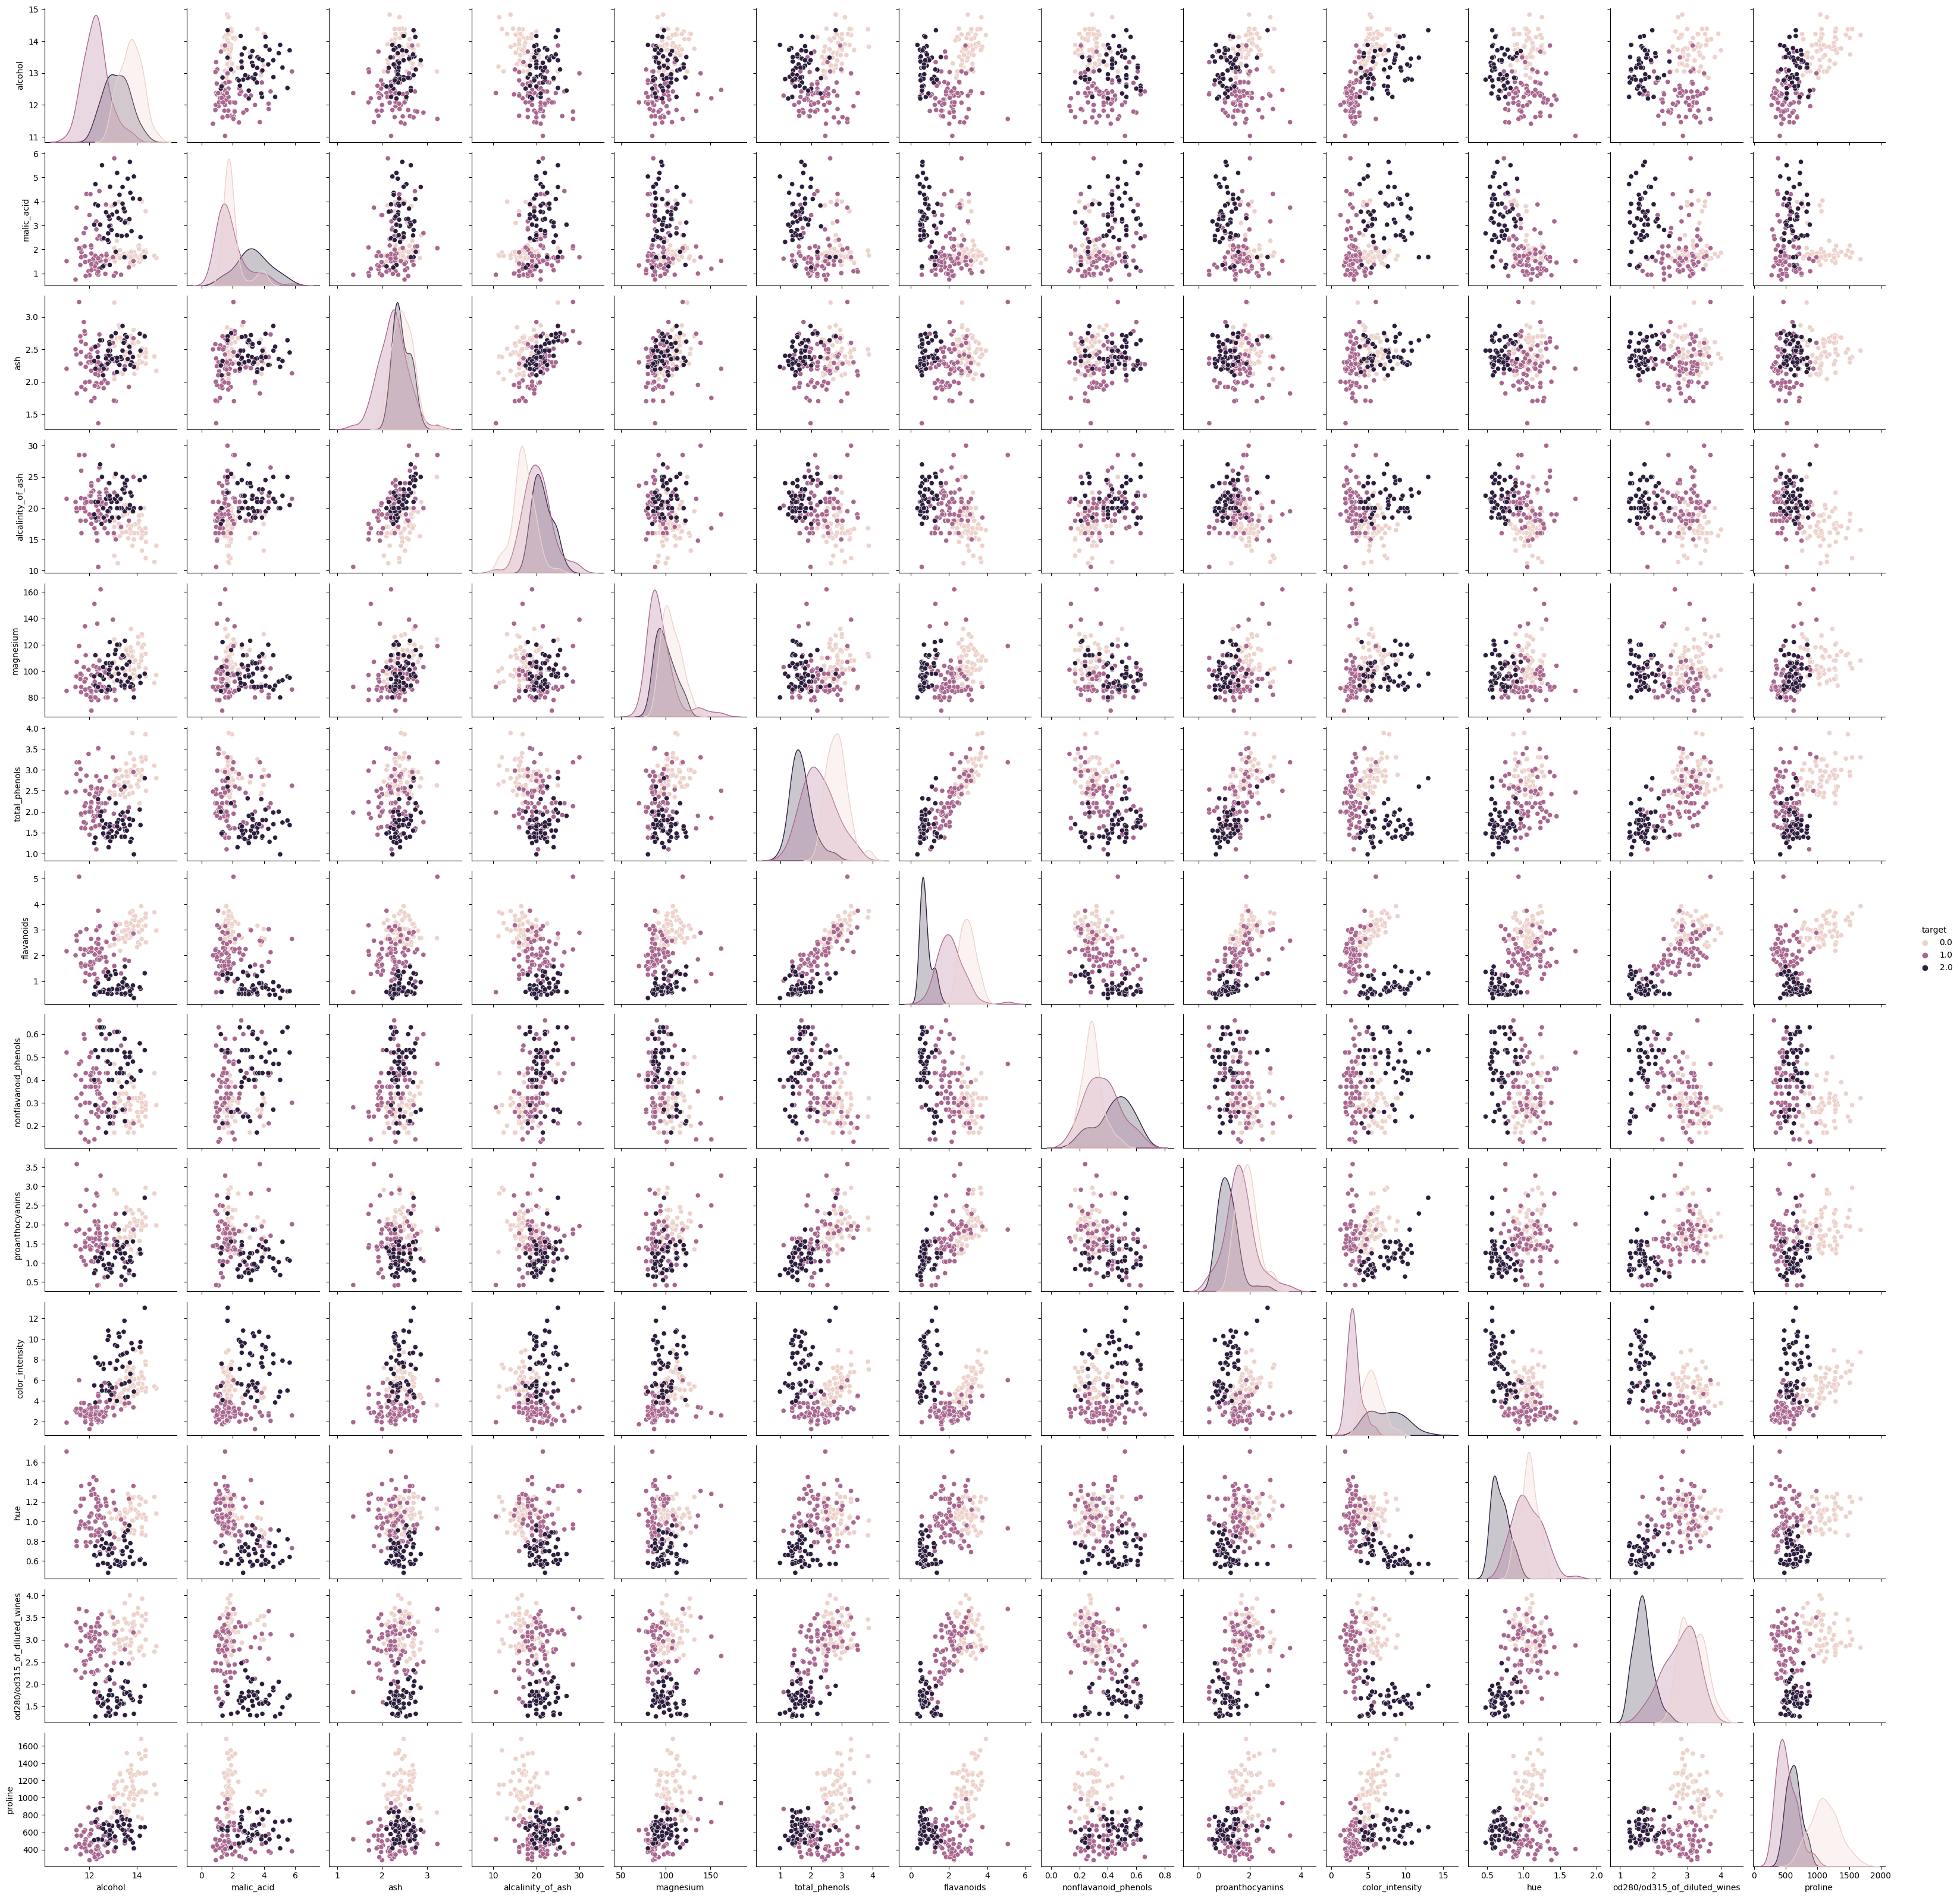

In [9]:
# Группировка по целевому признаку
sns.pairplot(df, hue="target")

In [10]:
# уникальные значения целевого признака
df["target"].unique()

array([0., 1., 2.])

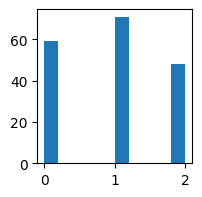

In [11]:
# Оценим дисбаланс классов для target
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(df["target"])
plt.show()

In [12]:
df["target"].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

In [17]:
# посчитаем дисбаланс классов
total = df.shape[0]
class_0, class_1, class_2 = df["target"].value_counts()
print('Класс 0 составляет {}% \nКласс 1 составляет {}% \nКласс 2 составляет {}%'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100, round(class_2 / total, 4)*100))

Класс 0 составляет 39.89% 
Класс 1 составляет 33.15% 
Класс 2 составляет 26.97%


**Дисбаланс классов присутствует, но является приемлемым.**

In [18]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

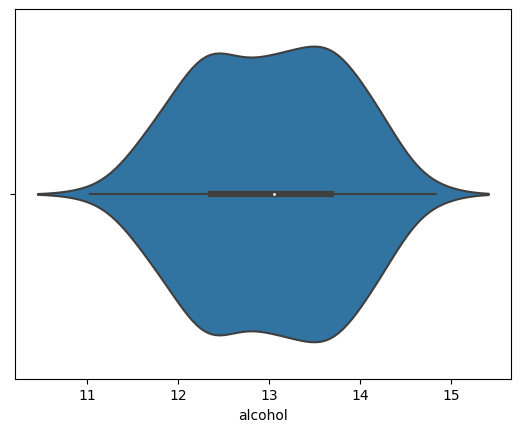

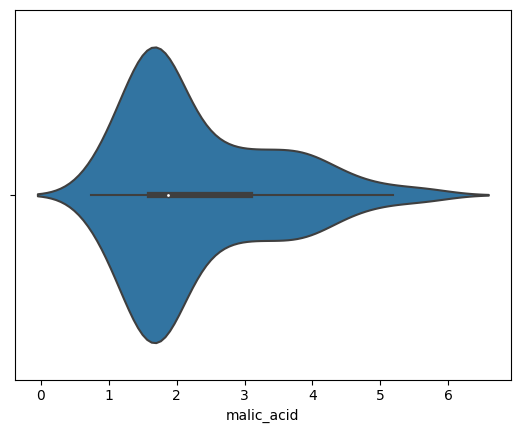

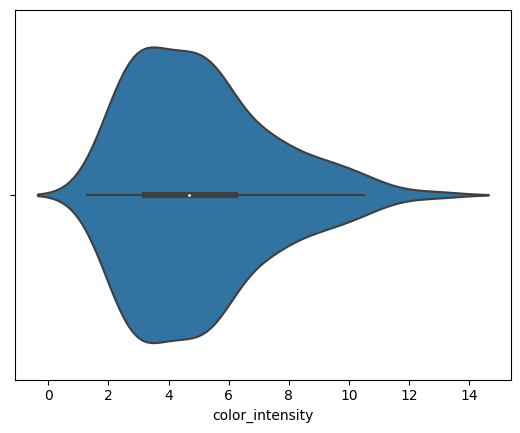

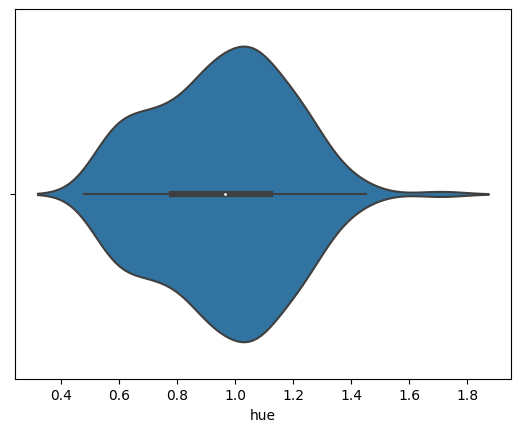

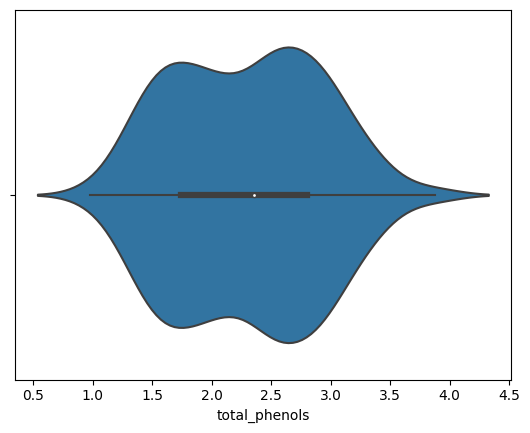

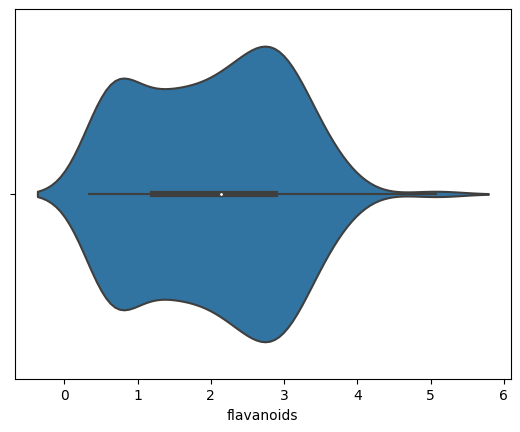

In [20]:
# Скрипичные диаграммы для числовых колонок
for col in ['alcohol', 'malic_acid', 'color_intensity', 'hue', 'total_phenols', 'flavanoids']:
    sns.violinplot(x=df[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [21]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

Для построения моделей будем использовать все признаки.
Категориальные признаки отсутствуют, их кодирования не требуется.

Выполним масштабирование данных:

In [24]:
data_all=df

In [22]:
# колонки для масштабирования
scale_cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [25]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_all[scale_cols])

In [26]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data_all[new_col_name] = sc1_data[:,i]

In [27]:
data_all.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  ...  \
0        3.06                  0.28             2.29             5.64  ...   
1        2.76                  0.26             1.28             4.38  ...   
2        3.24                  0.30             2.81             5.68  ...   
3        3.49                  0.24             2.18             7.80  ...   
4        2.69                  0.39             1.82             4.32  ...   

   alcalinity_of_ash_scaled  magnesium_scaled  total_phenols_scaled  \
0                  0.257732          0.619565              0.627586   
1                  0.030928          0.326087              0.575862   
2                  0.412371          0.336957              0.627586   
3                  0.319588          0.467391              0.989655   
4                  0.536082          0.521739              0.627586   

   flavanoids_scaled  nonflavanoid_phenols_scaled  proanthocyanins_scaled  \
0           0.573840                     0.283019                0.593060   
1           0.510549                     0.245283                0.274448   
2           0.611814                     0.320755                0.757098   
3           0.664557                     0.207547                0.558360   
4           0.495781                     0.490566                0.444795   

   color_intensity_scaled  hue_scaled  od280/od315_of_diluted_wines_scaled  \
0                0.372014    0.455285                             0.970696   
1                0.264505    0.463415                             0.780220   
2                0.375427    0.447154                             0.695971   
3                0.556314    0.308943                             0.798535   
4                0.259386    0.455285                             0.608059   

   proline_scaled  
0        0.561341  
1        0.550642  
2        0.646933  
3        0.857347  
4        0.325963  

[5 rows x 27 columns]

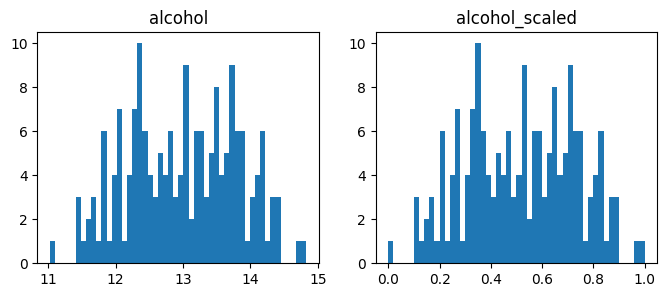

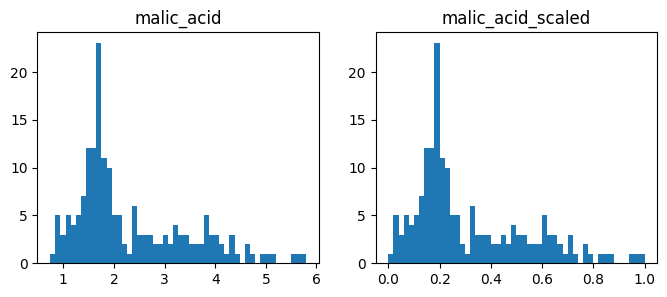

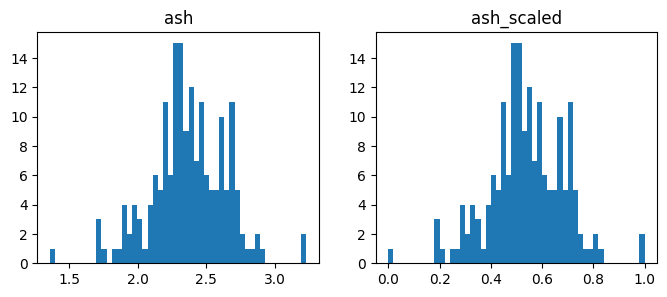

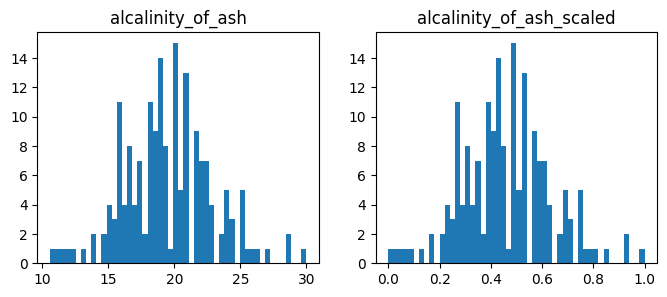

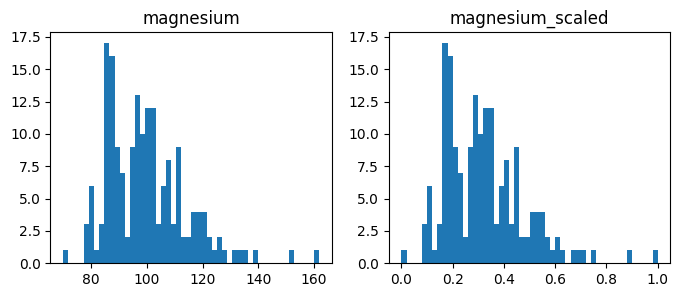

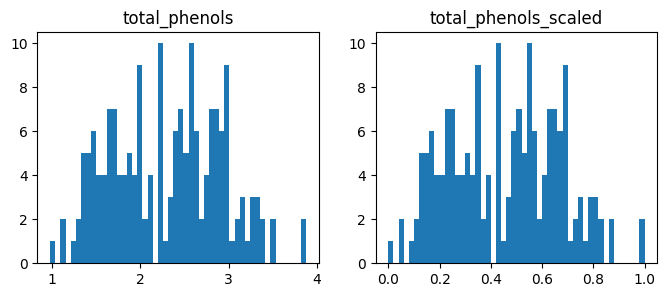

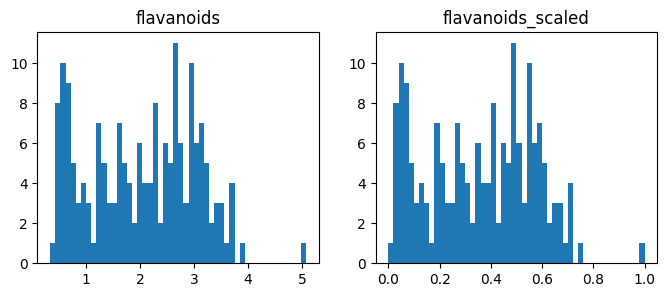

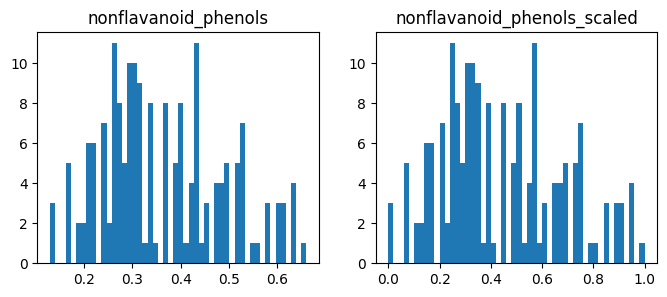

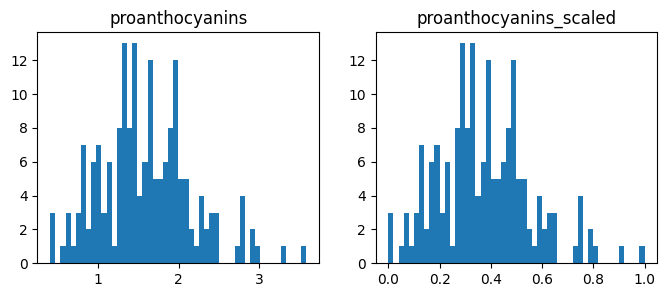

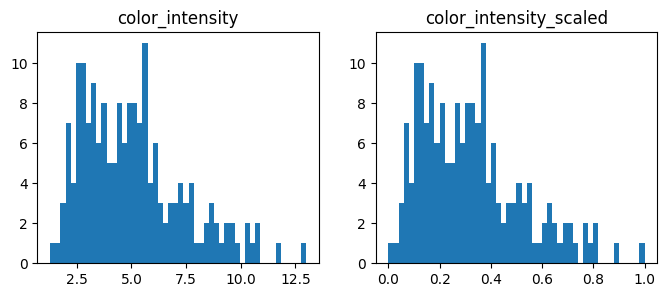

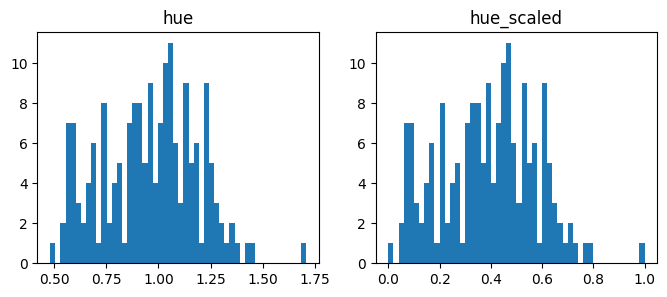

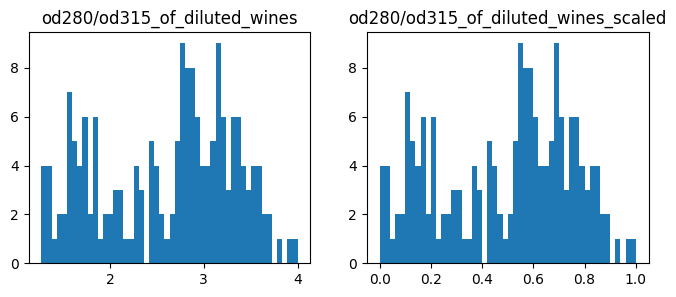

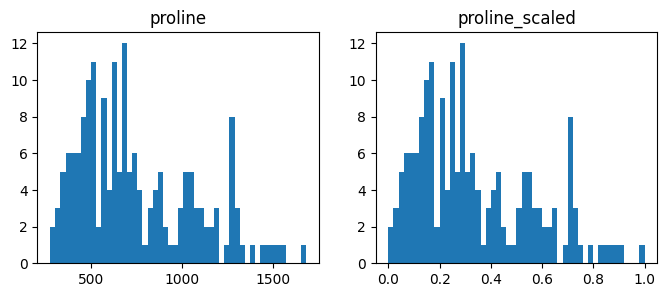

In [28]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data_all[col], 50)
    ax[1].hist(data_all[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [29]:
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'target']

In [32]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['alcohol_scaled',
 'malic_acid_scaled',
 'ash_scaled',
 'alcalinity_of_ash_scaled',
 'magnesium_scaled',
 'total_phenols_scaled',
 'flavanoids_scaled',
 'nonflavanoid_phenols_scaled',
 'proanthocyanins_scaled',
 'color_intensity_scaled',
 'hue_scaled',
 'od280/od315_of_diluted_wines_scaled',
 'proline_scaled',
 'target']

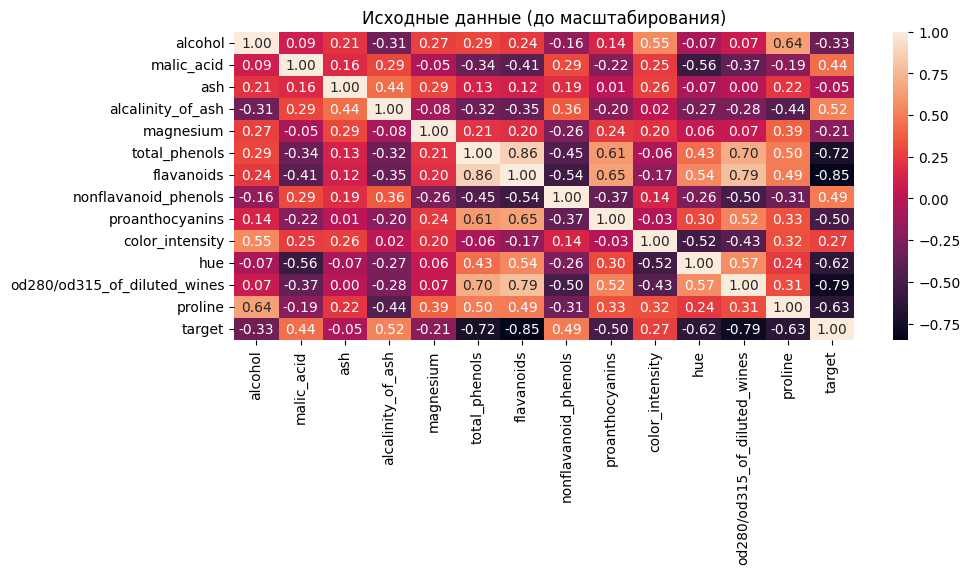

In [39]:
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(data_all[corr_cols_1].corr(), annot=True, fmt='.2f')
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

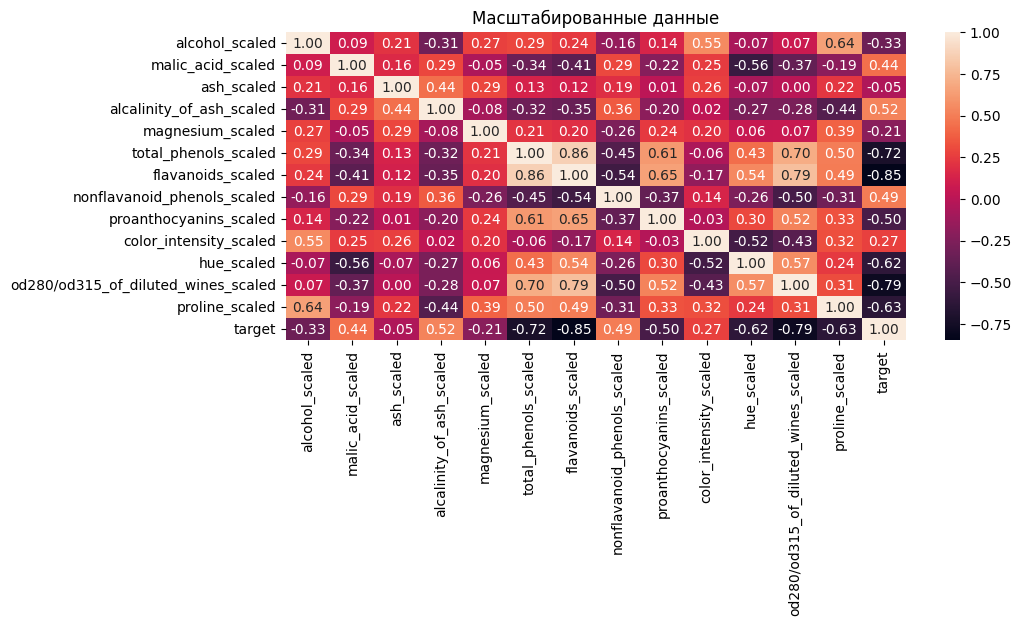

In [38]:
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(data_all[corr_cols_2].corr(), annot=True, fmt='.2f')
ax.set_title('Масштабированные данные')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак "target" наиболее сильно коррелирует с щелочностью пепла(alcalinity_of_ash) (0.52), нефлаваноидными фенолами(nonflavanoid_phenols) (0.56) и яблочной кислотой(malic_acid) (0.5). Эти признаки обязательно следует оставить в модели.
- Целевой признак "target" слабо коррелирует с пеплом(ash) (-0.05). Этот признак следует убрать из модели.
- Признаков, имеющих корреляцию, близкую по модулю к 1, нет.
- Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

## Выбор метрик для последующей оценки качества моделей.
### В качестве метрик для решения задачи классификации будем использовать:
- метрика accuracy
- метрика precision
- метрика recall
- метрика F1-мера
### Сохранение и визуализация метрик

In [40]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [43]:
# На основе масштабированных данных выделим обучающую и тестовую выборки
df_scaled = data_all[corr_cols_2]

y = df_scaled['target']
x = df_scaled.drop('target', axis = 1).drop('ash_scaled', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)

x_train.shape, x_test.shape

((106, 12), (72, 12))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [49]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=3),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [50]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [51]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [88]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(x_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test.values, Y_pred)
    # рассчитываются показатели для каждого ярлыка и находится их невзвешенное среднее значение. При этом не учитывается дисбаланс меток.
    precision = precision_score(y_test.values, Y_pred, average='macro') 
    recall = recall_score(y_test.values, Y_pred, average='macro')
    f1 = f1_score(y_test.values, Y_pred, average='macro')
    
    clasMetricLogger.add('accuracy', model_name, accuracy)
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)

    fig, ax = plt.subplots(ncols=1, figsize=(10,5))    
    cm = confusion_matrix(y_test, Y_pred, labels=np.unique(df_scaled.target), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df_scaled.target))
    disp.plot(ax=ax)
    ax.set_title(f"{model_name}\naccuracy: {accuracy}\nprecision: {precision}\nrecall: {recall}\nf1: {f1} ")
    
    plt.show()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

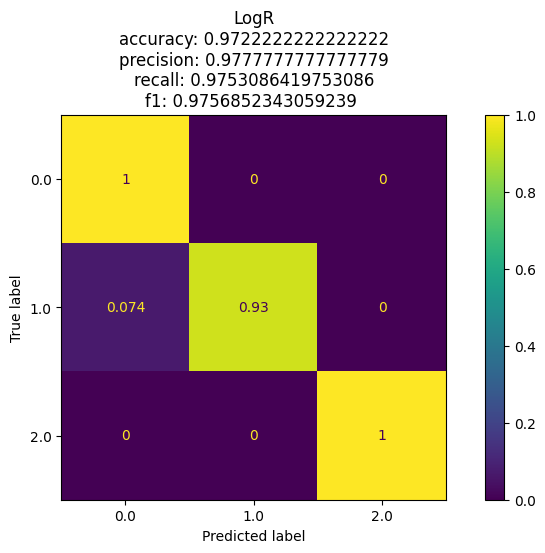

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

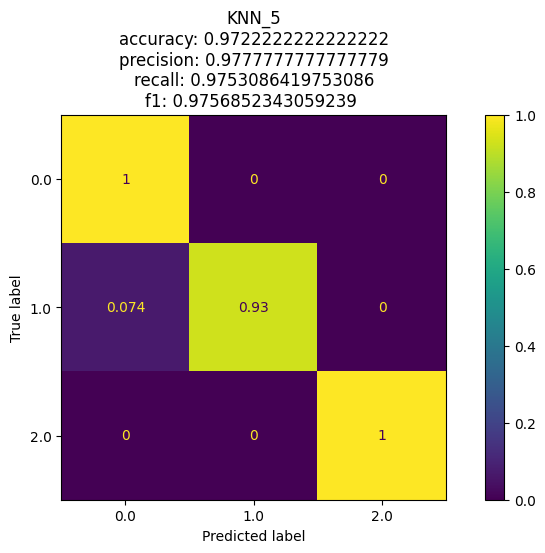

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

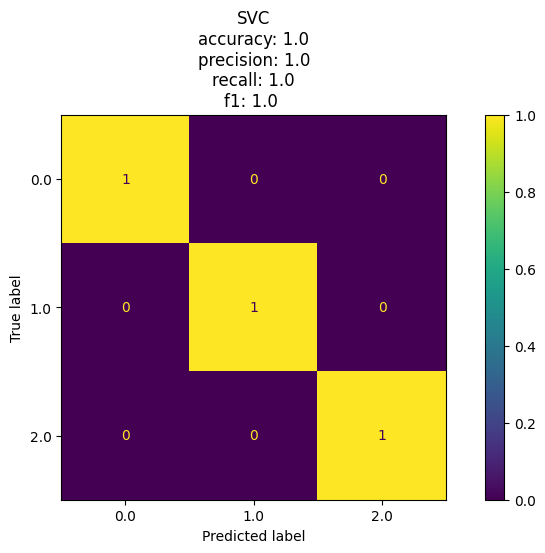

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

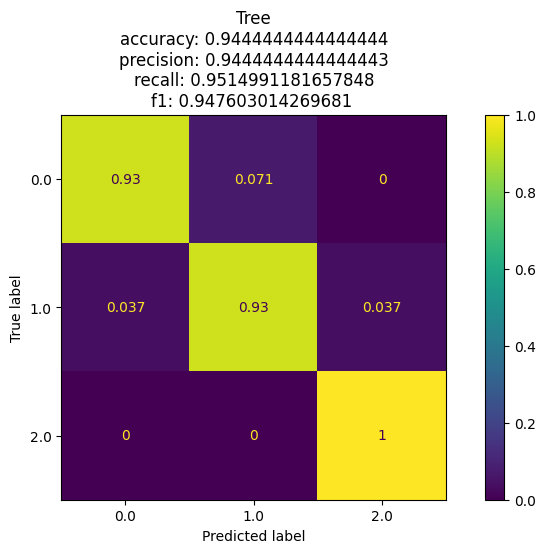

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

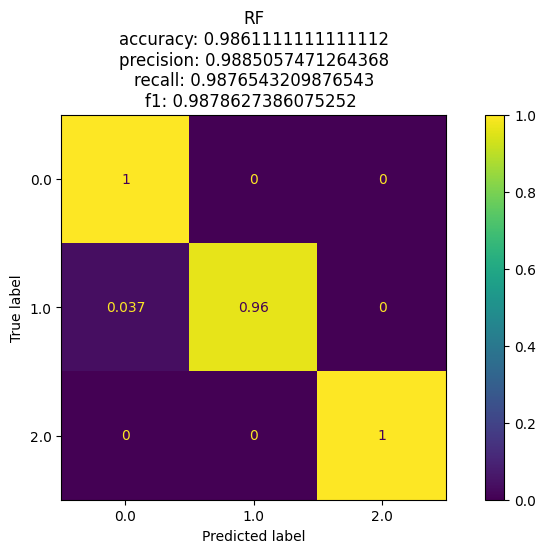

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

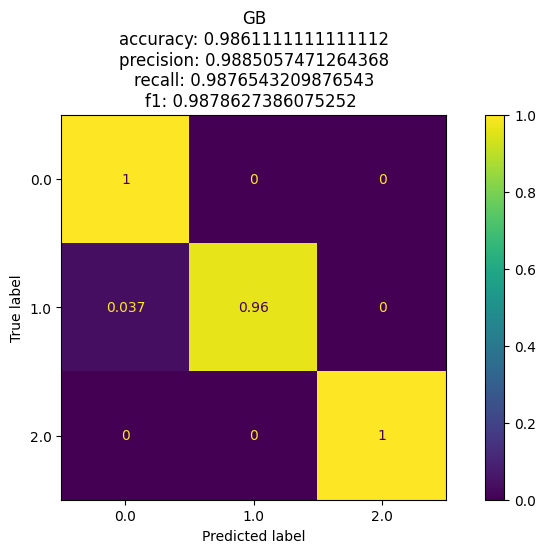

In [89]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [75]:
x_train.shape

(106, 12)

In [78]:
n_range = np.array(range(2,31,1))

In [79]:
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}]

In [80]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(x_train, y_train)

CPU times: total: 531 ms
Wall time: 529 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}],
             scoring='accuracy')

In [81]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [82]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 13}

In [85]:
clf_gs_best_params_txt = str(clf_gs.best_params_['n_neighbors'])
clf_gs_best_params_txt

'13'

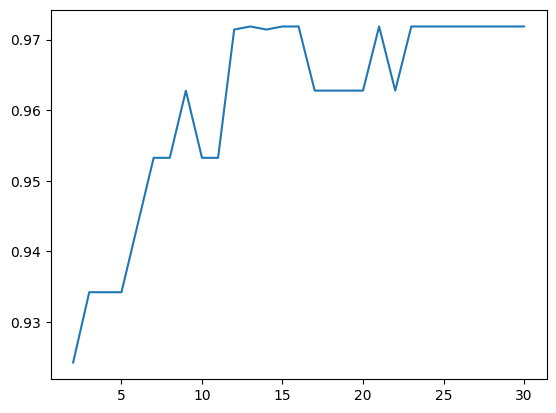

In [83]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## Повторение для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [86]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + clf_gs_best_params_txt):clf_gs.best_estimator_}

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

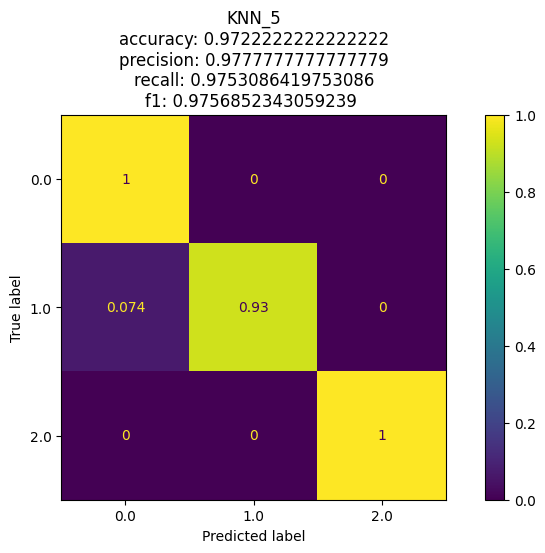

C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_index=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_11732\962908962.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(temp, ignore_

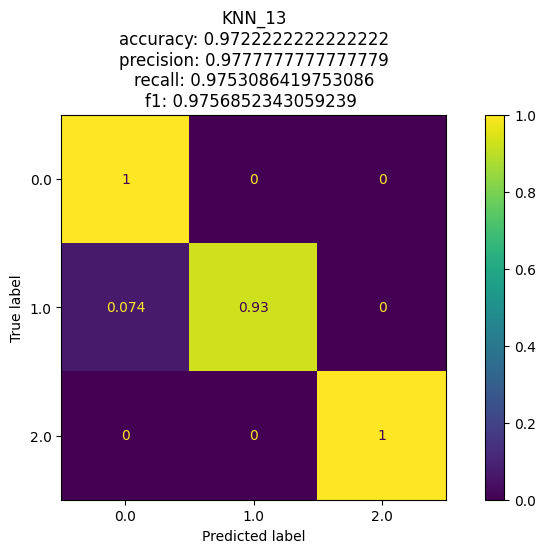

In [90]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [91]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['accuracy', 'precision', 'recall', 'f1'], dtype=object)

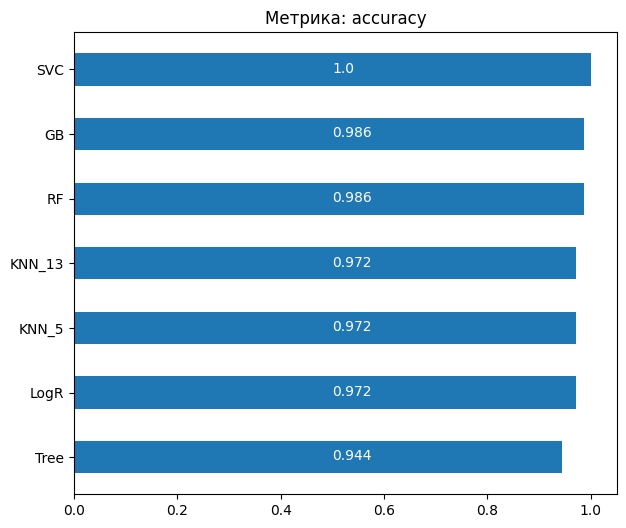

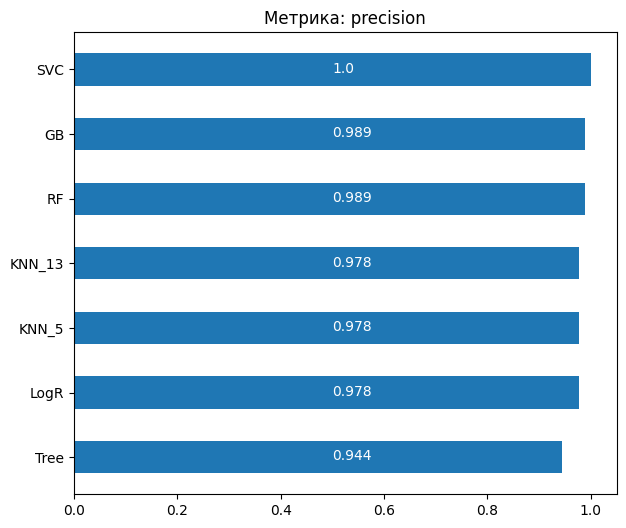

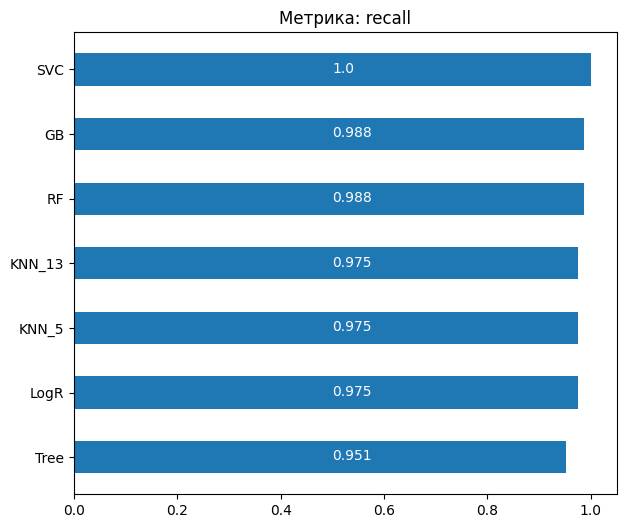

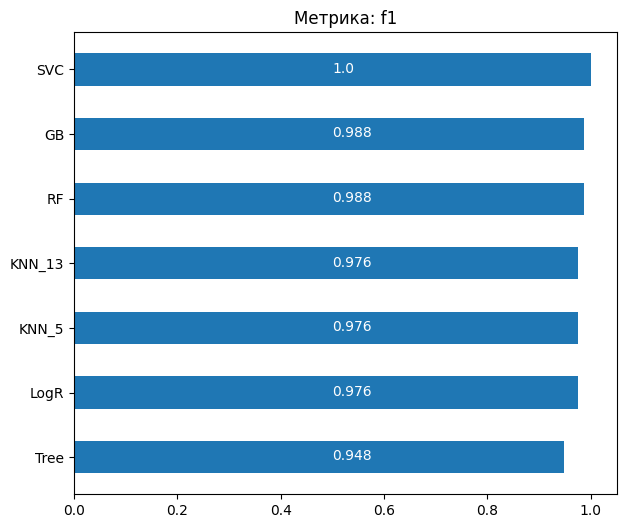

In [92]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

**Вывод: лучшей оказалась модель на основе машины опорных векторов, т.к. признаки в модели числовые, а не категориальные**